# S5 classification and regression test on symbol sequences

The input sequence is a 9-char sequence of A, B, C, e.g. BCACBAACB.

The classification target (output) is whether there are at least 5 A's, e.g.

BCACBAACB -> 0

ACACAAACB -> 1

The regression target is the number of A's divided by 9, e.g.

BCACBAACB -> .3333...

ACACAAACB -> .5555...

AAAAAAAAA -> 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

from disp import get_line, set_color, set_plot
from my_torch import fit_song_fmtn
from run_train import TrainArgs, train

cc = np.concatenate

## Classification test

In [2]:
DATA_DIR = 'ultralight/clf'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_clf", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='clf_token', dt_global=True, epochs=10, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_clf...
[*] Setting Randomness...
[*] Generating Token Sequence Classification Dataset


/home/rp21/.conda/envs/s5-gpu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clearing cache...


Saving the dataset (1/1 shards): 100%|██████████| 200/200 [00:00<00:00, 69963.37 examples/s] 


Vcab size: 6
[*] Starting S5 clf_token training on `ultralight/clf` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)
configuring standard optimization setup
[*] Trainable Parameters: 1802


/scratch/gpfs/rp21/s5_test/S5-regression/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:08<00:00,  2.90it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 408.79it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 5.86063 -- Val Loss: 0.54404 --Test Loss: 0.54404 -- Val Accuracy: 0.9350 -- Test Accuracy: 0.9350
	Best Val Loss: 0.54404 -- Best Val Accuracy: 0.9350 at Epoch 1
	Best Test Loss: 0.54404 -- Best Test Accuracy: 0.9350 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 52.81it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 437.64it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 444.72it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.53412 -- Val Loss: 0.58930 --Test Loss: 0.58930 -- Val Accuracy: 0.6750 -- Test Accuracy: 0.6750
	Best Val Loss: 0.54404 -- Best Val Accuracy: 0.9350 at Epoch 1
	Best Test Loss: 0.54404 -- Best Test Accuracy: 0.9350 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 52.73it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 445.25it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 448.98it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.17060 -- Val Loss: 0.57057 --Test Loss: 0.57057 -- Val Accuracy: 0.8300 -- Test Accuracy: 0.8300
	Best Val Loss: 0.54404 -- Best Val Accuracy: 0.9350 at Epoch 1
	Best Test Loss: 0.54404 -- Best Test Accuracy: 0.9350 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 52.74it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 423.33it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 443.52it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.13484 -- Val Loss: 0.52314 --Test Loss: 0.52314 -- Val Accuracy: 0.8000 -- Test Accuracy: 0.8000
	Best Val Loss: 0.52314 -- Best Val Accuracy: 0.9350 at Epoch 1
	Best Test Loss: 0.54404 -- Best Test Accuracy: 0.9350 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 52.77it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 444.88it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 446.24it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.11403 -- Val Loss: 0.30854 --Test Loss: 0.30854 -- Val Accuracy: 0.8350 -- Test Accuracy: 0.8350
	Best Val Loss: 0.30854 -- Best Val Accuracy: 0.9350 at Epoch 1
	Best Test Loss: 0.54404 -- Best Test Accuracy: 0.9350 at Epoch 1

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 52.84it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 442.50it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 443.94it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.11483 -- Val Loss: 0.15072 --Test Loss: 0.15072 -- Val Accuracy: 0.9450 -- Test Accuracy: 0.9450
	Best Val Loss: 0.15072 -- Best Val Accuracy: 0.9450 at Epoch 6
	Best Test Loss: 0.15072 -- Best Test Accuracy: 0.9450 at Epoch 6

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 52.87it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 443.64it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 447.82it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.11409 -- Val Loss: 0.09895 --Test Loss: 0.09895 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.09895 -- Best Val Accuracy: 1.0000 at Epoch 7
	Best Test Loss: 0.09895 -- Best Test Accuracy: 1.0000 at Epoch 7

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 52.83it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 446.56it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 444.15it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.10741 -- Val Loss: 0.08596 --Test Loss: 0.08596 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.08596 -- Best Val Accuracy: 1.0000 at Epoch 7
	Best Test Loss: 0.09895 -- Best Test Accuracy: 1.0000 at Epoch 7

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 52.77it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 441.29it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 450.41it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.10197 -- Val Loss: 0.09335 --Test Loss: 0.09335 -- Val Accuracy: 0.9750 -- Test Accuracy: 0.9750
	Best Val Loss: 0.08596 -- Best Val Accuracy: 1.0000 at Epoch 7
	Best Test Loss: 0.09895 -- Best Test Accuracy: 1.0000 at Epoch 7

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 52.92it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 436.20it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 446.94it/s]



=>> Epoch 10 Metrics ===
	Train Loss: 0.07947 -- Val Loss: 0.06494 --Test Loss: 0.06494 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.06494 -- Best Val Accuracy: 1.0000 at Epoch 7
	Best Test Loss: 0.09895 -- Best Test Accuracy: 1.0000 at Epoch 7



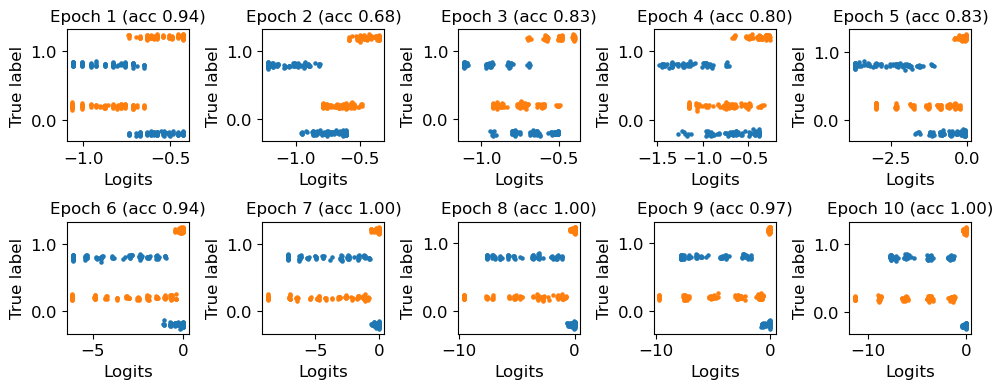

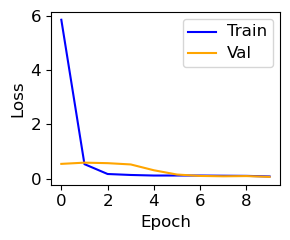

In [3]:
from disp import colors

# load results
fig, axs = plt.subplots(2, 5, figsize=(10, 4), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_clf/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    acc = np.mean(targs == preds.argmax(1))
    
    labels = np.sort(np.unique(targs))
    y_ticks = []
    
    for clabel_0, label_0 in enumerate(labels):
        for clabel_1, label_1 in enumerate(labels):
            logits = preds[targs==label_0, clabel_1]
            display_jitter = .02*np.random.randn(len(logits))
            ax.scatter(logits, np.zeros(len(logits)) + clabel_0 + .8*clabel_1/len(labels) + display_jitter, c=colors[clabel_1], s=5)
            
        y_ticks.append(clabel_0 + .2)
    
    set_plot(ax, y_ticks=y_ticks, y_tick_labels=labels, x_label='Logits', y_label='True label', title=f'Epoch {cepoch+1} (acc {acc:.2f})')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')

# Regression test

In [4]:
DATA_DIR = 'ultralight/rgr'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_rgr", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='rgr_token', dt_global=True, epochs=20, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_rgr...
[*] Setting Randomness...
[*] Generating Token Sequence Regression Dataset
Clearing cache...


Saving the dataset (1/1 shards): 100%|██████████| 200/200 [00:00<00:00, 69800.37 examples/s] 


Vocab size: 6
[*] Starting S5 rgr_token training on `ultralight/rgr` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)
configuring standard optimization setup
[*] Trainable Parameters: 1793
[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:07<00:00,  3.13it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 403.93it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 3.92613 -- Val Loss: 0.58546 --Test Loss: 0.58546 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.58546 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 53.25it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.68it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 285.46it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.61611 -- Val Loss: 0.71647 --Test Loss: 0.71647 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.58546 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 53.16it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.87it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 286.72it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.32877 -- Val Loss: 1.11534 --Test Loss: 1.11534 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.58546 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 53.10it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.41it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 285.42it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.23850 -- Val Loss: 1.74584 --Test Loss: 1.74584 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.58546 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 53.09it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.09it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 284.72it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.20278 -- Val Loss: 1.91959 --Test Loss: 1.91959 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.58546 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 52.93it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 412.95it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 287.32it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.20526 -- Val Loss: 1.74870 --Test Loss: 1.74870 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.58546 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 53.10it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.91it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 286.86it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.50302 -- Val Loss: 0.48910 --Test Loss: 0.48910 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.48910 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 53.23it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.49it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 286.57it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.18783 -- Val Loss: 0.09432 --Test Loss: 0.09432 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.09432 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 53.21it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 417.38it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 285.82it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.23532 -- Val Loss: 0.17266 --Test Loss: 0.17266 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.09432 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 53.16it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.90it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 285.25it/s]



=>> Epoch 10 Metrics ===
	Train Loss: 0.15871 -- Val Loss: 0.12019 --Test Loss: 0.12019 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.09432 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 11...
using constant lr for epoch 11


100%|██████████| 25/25 [00:00<00:00, 53.10it/s]


[*] Running Epoch 11 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.91it/s]


[*] Running Epoch 11 Test...


100%|██████████| 7/7 [00:00<00:00, 284.54it/s]



=>> Epoch 11 Metrics ===
	Train Loss: 0.15559 -- Val Loss: 0.04326 --Test Loss: 0.04326 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.04326 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 12...
using constant lr for epoch 12


100%|██████████| 25/25 [00:00<00:00, 53.19it/s]


[*] Running Epoch 12 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.18it/s]


[*] Running Epoch 12 Test...


100%|██████████| 7/7 [00:00<00:00, 285.30it/s]



=>> Epoch 12 Metrics ===
	Train Loss: 0.13888 -- Val Loss: 0.02948 --Test Loss: 0.02948 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 13...
using constant lr for epoch 13


100%|██████████| 25/25 [00:00<00:00, 53.18it/s]


[*] Running Epoch 13 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.12it/s]


[*] Running Epoch 13 Test...


100%|██████████| 7/7 [00:00<00:00, 285.34it/s]



=>> Epoch 13 Metrics ===
	Train Loss: 0.12040 -- Val Loss: 0.07235 --Test Loss: 0.07235 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 14...
using constant lr for epoch 14


100%|██████████| 25/25 [00:00<00:00, 50.03it/s]


[*] Running Epoch 14 Validation...


100%|██████████| 7/7 [00:00<00:00, 415.10it/s]


[*] Running Epoch 14 Test...


100%|██████████| 7/7 [00:00<00:00, 286.76it/s]



=>> Epoch 14 Metrics ===
	Train Loss: 0.11366 -- Val Loss: 0.12601 --Test Loss: 0.12601 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 15...
using constant lr for epoch 15


100%|██████████| 25/25 [00:00<00:00, 53.17it/s]


[*] Running Epoch 15 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.66it/s]


[*] Running Epoch 15 Test...


100%|██████████| 7/7 [00:00<00:00, 286.31it/s]



=>> Epoch 15 Metrics ===
	Train Loss: 0.16440 -- Val Loss: 0.06776 --Test Loss: 0.06776 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 16...
using constant lr for epoch 16


100%|██████████| 25/25 [00:00<00:00, 53.24it/s]


[*] Running Epoch 16 Validation...


100%|██████████| 7/7 [00:00<00:00, 415.67it/s]


[*] Running Epoch 16 Test...


100%|██████████| 7/7 [00:00<00:00, 287.01it/s]



=>> Epoch 16 Metrics ===
	Train Loss: 0.15209 -- Val Loss: 0.04490 --Test Loss: 0.04490 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 17...
using constant lr for epoch 17


100%|██████████| 25/25 [00:00<00:00, 53.07it/s]


[*] Running Epoch 17 Validation...


100%|██████████| 7/7 [00:00<00:00, 415.01it/s]


[*] Running Epoch 17 Test...


100%|██████████| 7/7 [00:00<00:00, 286.49it/s]



=>> Epoch 17 Metrics ===
	Train Loss: 0.08129 -- Val Loss: 0.09192 --Test Loss: 0.09192 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 18...
using constant lr for epoch 18


100%|██████████| 25/25 [00:00<00:00, 53.19it/s]


[*] Running Epoch 18 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.85it/s]


[*] Running Epoch 18 Test...


100%|██████████| 7/7 [00:00<00:00, 287.03it/s]



=>> Epoch 18 Metrics ===
	Train Loss: 0.07195 -- Val Loss: 0.07078 --Test Loss: 0.07078 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 19...
using constant lr for epoch 19


100%|██████████| 25/25 [00:00<00:00, 53.10it/s]


[*] Running Epoch 19 Validation...


100%|██████████| 7/7 [00:00<00:00, 414.33it/s]


[*] Running Epoch 19 Test...


100%|██████████| 7/7 [00:00<00:00, 287.03it/s]



=>> Epoch 19 Metrics ===
	Train Loss: 0.11417 -- Val Loss: 0.05941 --Test Loss: 0.05941 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 20...
using constant lr for epoch 20


100%|██████████| 25/25 [00:00<00:00, 53.15it/s]


[*] Running Epoch 20 Validation...


100%|██████████| 7/7 [00:00<00:00, 413.30it/s]


[*] Running Epoch 20 Test...


100%|██████████| 7/7 [00:00<00:00, 285.05it/s]



=>> Epoch 20 Metrics ===
	Train Loss: 0.07318 -- Val Loss: 0.03017 --Test Loss: 0.03017 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02948 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1



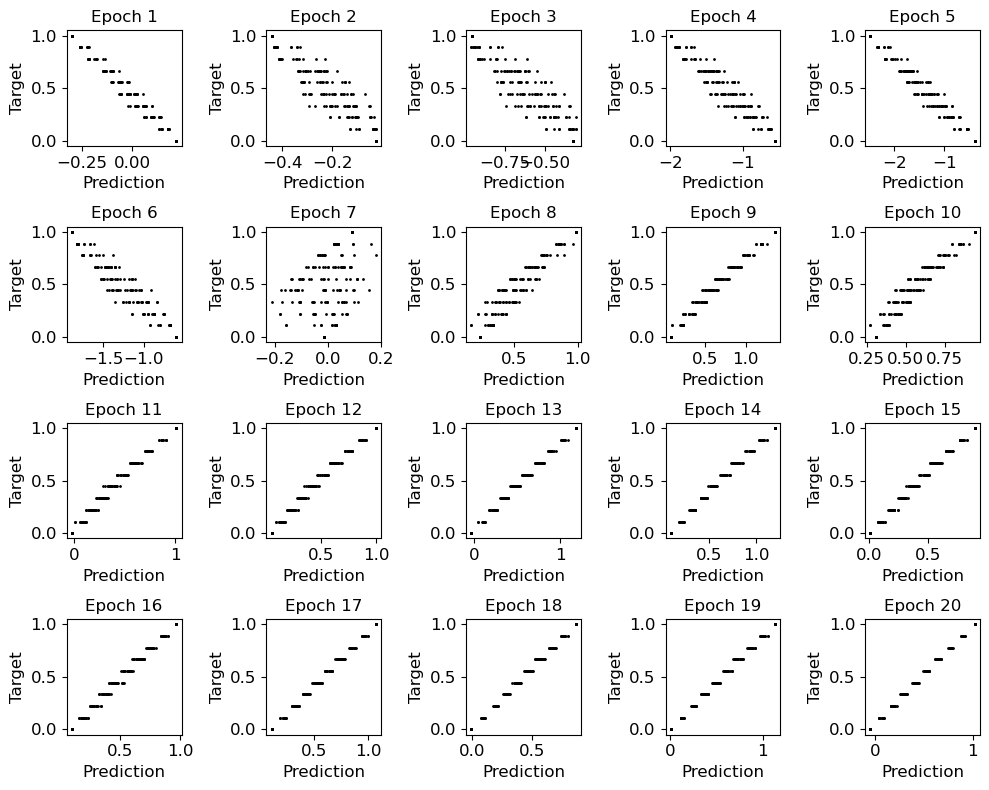

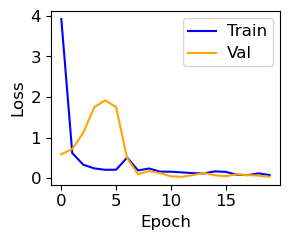

In [5]:
# load results
fig, axs = plt.subplots(4, 5, figsize=(10, 8), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    ax.scatter(preds, targs, c='k', s=1)
    
    set_plot(ax, x_label='Prediction', y_label='Target', title=f'Epoch {cepoch+1}')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')